<a href="https://colab.research.google.com/github/rawatpremsingh999/Propulsion-Plants-Decay-Evaluation/blob/master/Propulsion_Plants_Decay_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading Data from github**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/rawatpremsingh999/Propulsion-Plants-Decay-Evaluation/master/propulsion.csv",index_col=["Unnamed: 0"])

In [ ]:
df.head()

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


In [ ]:
df.shape

(10000, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lever position (lp) [ ]                        10000 non-null  float64
 1   Ship speed (v) [knots]                         10000 non-null  float64
 2   Gas Turbine shaft torque (GTT) [kN m]          10000 non-null  float64
 3   Gas Turbine rate of revolutions (GTn) [rpm]    10000 non-null  float64
 4   Gas Generator rate of revolutions (GGn) [rpm]  10000 non-null  float64
 5   Starboard Propeller Torque (Ts) [kN]           10000 non-null  float64
 6   Port Propeller Torque (Tp) [kN]                10000 non-null  float64
 7   HP Turbine exit temperature (T48) [C]          10000 non-null  float64
 8   GT Compressor inlet air temperature (T1) [C]   10000 non-null  float64
 9   GT Compressor outlet air temperature (T2) [C]  1000

In [ ]:
df.describe().T

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.150075,14.951400,27100.647714,2131.151788,8194.182366,225.957785,225.957785,734.476178,288.0,645.748980,2.345732,9.980000e-01,12.262597,1.029402,33.480715,0.659100,0.975021,0.987455
std,2.624015,7.740467,22062.780307,772.211732,1090.569425,199.737886,199.737886,173.009157,0.0,72.483036,1.081038,2.236101e-13,5.320817,0.010353,25.721725,0.504791,0.014734,0.007510
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,444.731000,288.0,540.999000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.950000,0.975000
25%,3.144000,9.000000,8375.791500,1386.758000,7056.520500,60.317000,60.317000,589.841000,288.0,577.980750,1.389000,9.980000e-01,7.445000,1.020000,13.534000,0.246000,0.962000,0.981000
50%,5.140000,15.000000,21630.133500,1924.325000,8480.527000,175.264000,175.264000,705.351000,288.0,636.800000,2.082000,9.980000e-01,11.086000,1.026000,25.249500,0.496000,0.975000,0.987000
75%,7.148000,21.000000,39000.710250,2678.078000,9132.132500,332.360000,332.360000,833.154750,288.0,693.656750,2.981000,9.980000e-01,15.649000,1.036000,44.500000,0.881000,0.988000,0.994000
max,9.300000,27.000000,72783.338000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.000000,1.000000


**Correlation Analysis using Heatmap**

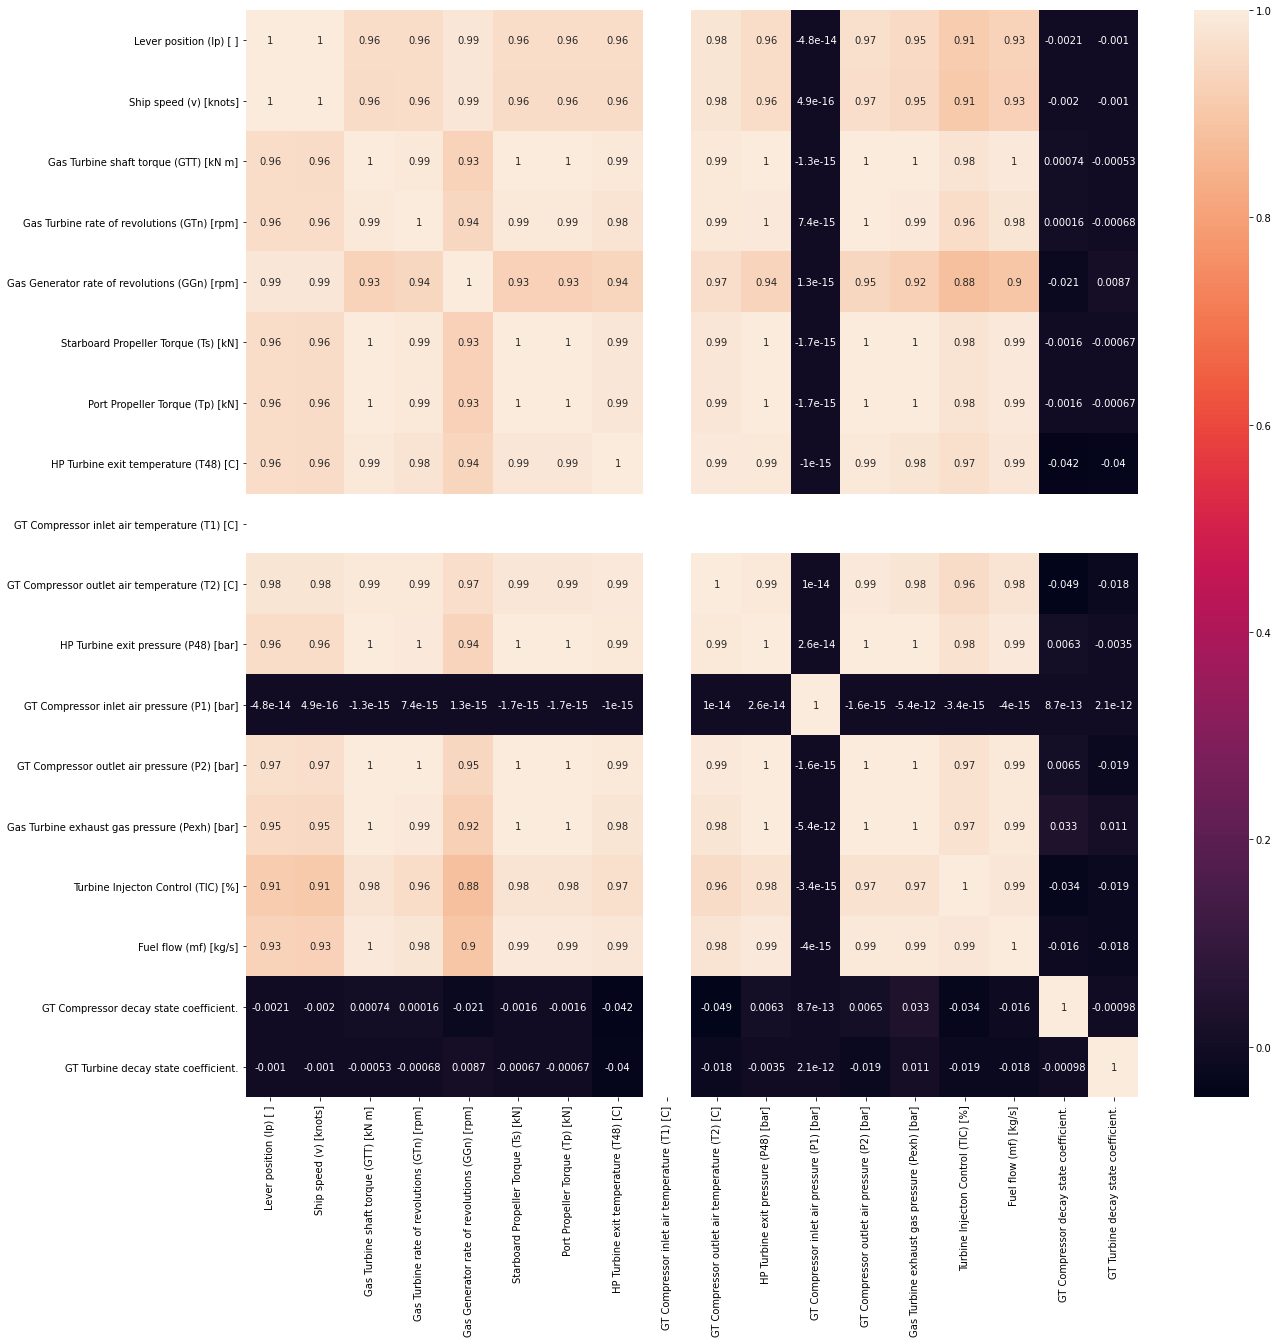

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df.columns

Index(['Lever position (lp) [ ]', 'Ship speed (v) [knots]',
       'Gas Turbine shaft torque (GTT) [kN m]',
       'Gas Turbine rate of revolutions (GTn) [rpm]',
       'Gas Generator rate of revolutions (GGn) [rpm]',
       'Starboard Propeller Torque (Ts) [kN]',
       'Port Propeller Torque (Tp) [kN]',
       'HP Turbine exit temperature (T48) [C]',
       'GT Compressor inlet air temperature (T1) [C]',
       'GT Compressor outlet air temperature (T2) [C]',
       'HP Turbine exit pressure (P48) [bar]',
       'GT Compressor inlet air pressure (P1) [bar]',
       'GT Compressor outlet air pressure (P2) [bar]',
       'Gas Turbine exhaust gas pressure (Pexh) [bar]',
       'Turbine Injecton Control (TIC) [%]', 'Fuel flow (mf) [kg/s]',
       'GT Compressor decay state coefficient.',
       'GT Turbine decay state coefficient.'],
      dtype='object')

In [ ]:
df_for_Turbine = df.drop(columns = ['Ship speed (v) [knots]',
       'GT Compressor inlet air temperature (T1) [C]',
       'GT Compressor inlet air pressure (P1) [bar]'])
df_for_Turbine.head()

,Lever position (lp) [ ],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,9.300,72762.205,3560.393,9753.812,644.806,644.806,1086.583,780.304,4.523,22.879,1.050,90.435,1.790,0.973,0.978
1,6.175,29760.552,2306.825,8780.012,246.011,246.011,776.921,665.511,2.518,13.438,1.030,34.596,0.685,0.995,0.975
2,3.144,8375.774,1386.739,7051.621,60.318,60.318,589.764,580.587,1.392,7.566,1.020,12.477,0.247,0.980,0.978
3,3.144,8377.589,1386.748,7098.469,60.339,60.339,570.651,576.565,1.390,7.409,1.021,11.678,0.231,0.984,1.000
4,6.175,29761.091,2306.825,8782.024,246.021,246.021,769.855,663.682,2.518,13.374,1.031,34.154,0.676,0.998,0.980


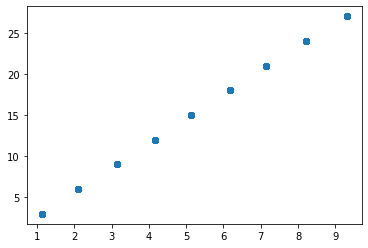

In [ ]:
plt.scatter(df['Lever position (lp) [ ]'],df['Ship speed (v) [knots]',])
plt.show()

(array([1176.,  760., 1160.,  784., 1151.,  770., 1145.,  755., 1147.,
        1152.]),
 array([0.975 , 0.9775, 0.98  , 0.9825, 0.985 , 0.9875, 0.99  , 0.9925,
        0.995 , 0.9975, 1.    ]),
 <a list of 10 Patch objects>)

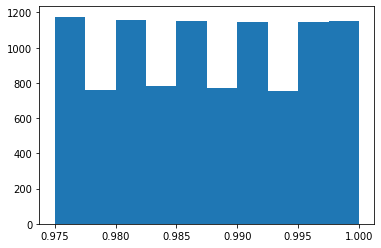

In [ ]:
plt.hist(df['GT Turbine decay state coefficient.'])

In [ ]:
# stats library for statistical analysis
import statsmodels.api as sm
from scipy import stats

In [ ]:
X = df_for_Turbine.iloc[:,:-1]
y = df_for_Turbine.iloc[:,-1]
z = sm.add_constant(X)
model = sm.OLS(y,z).fit()
print(model.summary())

                                     OLS Regression Results                                    
Dep. Variable:     GT Turbine decay state coefficient.   R-squared:                       0.941
Model:                                             OLS   Adj. R-squared:                  0.941
Method:                                  Least Squares   F-statistic:                 1.225e+04
Date:                                 Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                                         14:23:19   Log-Likelihood:                 48877.
No. Observations:                                10000   AIC:                        -9.773e+04
Df Residuals:                                     9986   BIC:                        -9.762e+04
Df Model:                                           13                                         
Covariance Type:                             nonrobust                                         
                                        

In [ ]:
E = model.resid_pearson
E

array([-1.41313886, -1.49891168, -1.14032117, ...,  1.36861355,
       -1.51761263, -0.88232901])

In [ ]:
y_hat = model.predict(z)
y_hat[:5]

0    0.987889
1    0.985490
2    0.985980
3    0.988823
4    0.986120
dtype: float64

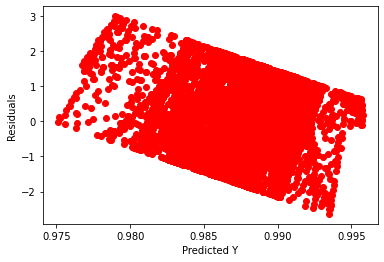

In [ ]:
plt.scatter(y_hat,E,color='red')
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model_etr = ExtraTreesRegressor()
model_etr.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
important_feature = [round(x,5) for x in model_etr.feature_importances_]
important_feature

[0.01402,
 0.059,
 0.0569,
 0.12744,
 0.02142,
 0.02333,
 0.05436,
 0.02625,
 0.0356,
 0.33854,
 0.03833,
 0.08292,
 0.0813,
 0.04059]

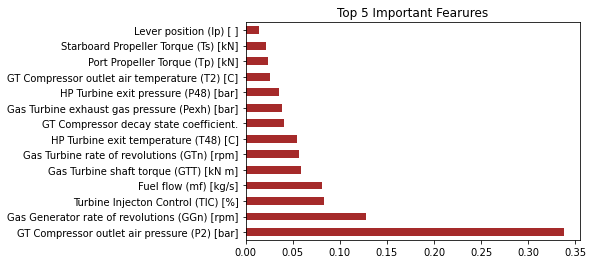

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_etr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',color='brown')
plt.title('Top 5 Important Fearures')
plt.show()

In [ ]:
X = df.iloc[:,:-2]
y = df.iloc[:,-2]
z = sm.add_constant(X)
model = sm.OLS(y,z).fit()
print(model.summary())

                                      OLS Regression Results                                      
Dep. Variable:     GT Compressor decay state coefficient.   R-squared:                       0.843
Model:                                                OLS   Adj. R-squared:                  0.843
Method:                                     Least Squares   F-statistic:                     4117.
Date:                                    Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                                            09:47:55   Log-Likelihood:                 37237.
No. Observations:                                   10000   AIC:                        -7.445e+04
Df Residuals:                                        9986   BIC:                        -7.435e+04
Df Model:                                              13                                         
Covariance Type:                                nonrobust                                         
          

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model_etr = ExtraTreesRegressor()
model_etr.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
important_feature = [round(x,5) for x in model_etr.feature_importances_]
important_feature

[0.03762, 0.18204, 0.05791, 0.05618, 0.44278, 0.10802, 0.11544]

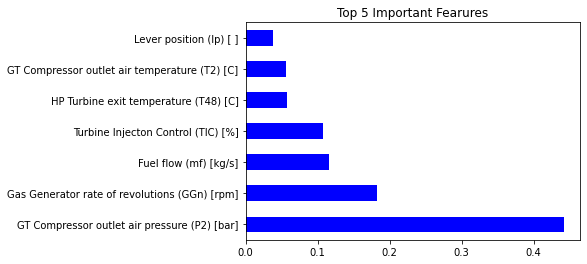

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_etr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',color='blue')
plt.title('Top 5 Important Fearures')
plt.show()

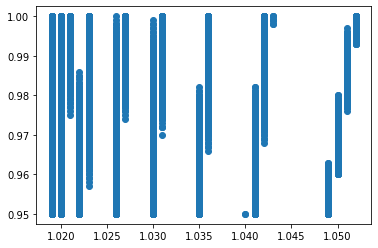

In [ ]:
plt.scatter(df['Gas Turbine exhaust gas pressure (Pexh) [bar]'],df['GT Compressor decay state coefficient.'])

In [ ]:
# Importing some necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:

# Split Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 14) (2000, 14) (8000,) (2000,)


In [ ]:
# setting intercept as true
lgr = LinearRegression(fit_intercept = True)

In [ ]:
# fit the model
model_lin1 = lgr.fit(X_train,y_train)

In [ ]:
# predicting model on test data
car_predictions_lin1 = model_lin1.predict(X_test)

In [ ]:
# R Squared Value
r2_lin_train1 = model_lin1.score(X_train,y_train)
r2_lin_test1 = model_lin1.score(X_test,y_test)
print('R2 for Train Data',r2_lin_train1)
print('R2 for Test Data', r2_lin_test1)

R2 for Train Data 0.9404032200509301
R2 for Test Data 0.9431548242415863


In [ ]:
print('MAE:', mean_absolute_error(y_test, car_predictions_lin1))
print('MSE:', mean_squared_error(y_test, car_predictions_lin1))
print('RMSE:', np.sqrt(mean_squared_error(y_test, car_predictions_lin1)))
print('R2 Score:', r2_score(y_test, car_predictions_lin1))

MAE: 0.001200714580416049
MSE: 3.210446114000165e-06
RMSE: 0.0017917717806685551
R2 Score: 0.9431548242415863


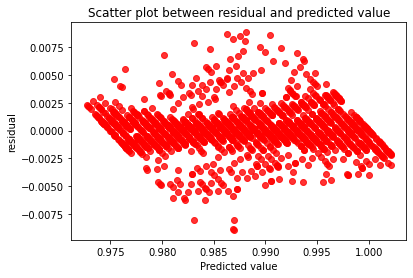

In [ ]:
# Residuals plot
residual1  = y_test - car_predictions_lin1
sns.regplot(x = car_predictions_lin1, y = residual1,scatter = True, fit_reg= False,color='red')
plt.xlabel('Predicted value')
plt.ylabel('residual')
plt.title('Scatter plot between residual and predicted value')
plt.show()

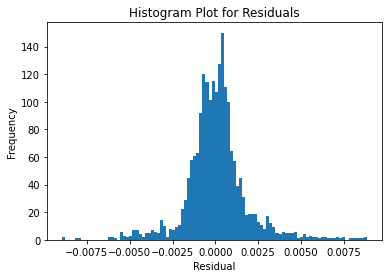

In [ ]:
plt.hist(residual1,bins=100)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram Plot for Residuals')
plt.show()

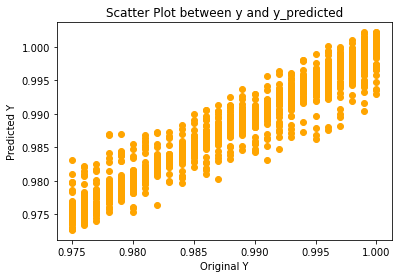

In [ ]:
plt.scatter(y_test,car_predictions_lin1,c='orange')
plt.xlabel('Original Y')
plt.ylabel('Predicted Y')
plt.title('Scatter Plot between y and y_predicted')
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2,5,10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10,15,20]

In [ ]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10, 15, 20]}


In [ ]:
# Random search of parameters, using 5 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=  39.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=  37.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=  38.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=  37.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=  37.7s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30, total=  21.4s
[CV] n_estimators=500, min_samples_split=100, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 17.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 400}

In [ ]:
rf_random.best_score_

-1.0606323937124724e-06

In [ ]:
y_pred = rf_random.predict(X_test)

In [ ]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 0.000550494799732712
MSE: 9.817471108562659e-07
RMSE: 0.0009908315249608612
R2 Score: 0.9826168747005057


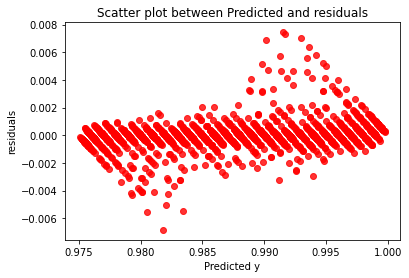

In [ ]:
# Residuals plot
residuals  = y_test - y_pred
sns.regplot(x = y_pred, y = residuals,scatter = True, fit_reg= False,color='red')
plt.xlabel('Predicted y')
plt.ylabel('residuals')
plt.title('Scatter plot between Predicted and residuals')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


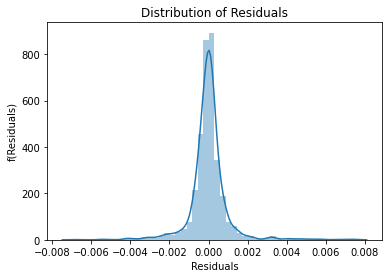

In [ ]:
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('f(Residuals)')
plt.title('Distribution of Residuals')
plt.show()

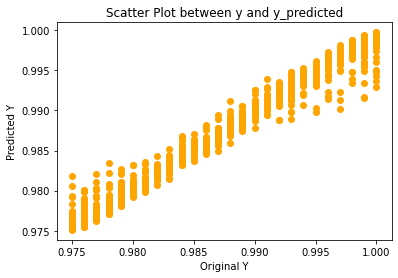

In [ ]:
plt.scatter(y_test,y_pred,c='orange')
plt.xlabel('Original Y')
plt.ylabel('Predicted Y')
plt.title('Scatter Plot between y and y_predicted')
plt.show()

## Deep Learning Neural Network

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.3.0


In [ ]:
normalizer = preprocessing.Normalization()

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(4, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.0005))
  return model

In [ ]:
dl_model = build_and_compile_model(normalizer)

In [ ]:
%%time
history = dl_model.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=1, epochs=200)

Epoch 1/200
200/200 [==============================] - 0s 2ms/step - loss: 35631500.0000 - val_loss: 18011266.0000
Epoch 2/200
200/200 [==============================] - 0s 1ms/step - loss: 11662784.0000 - val_loss: 6675830.0000
Epoch 3/200
200/200 [==============================] - 0s 1ms/step - loss: 4629649.5000 - val_loss: 2845556.7500
Epoch 4/200
200/200 [==============================] - 0s 1ms/step - loss: 2026160.7500 - val_loss: 1269624.3750
Epoch 5/200
200/200 [==============================] - 0s 1ms/step - loss: 893220.1875 - val_loss: 543242.2500
Epoch 6/200
200/200 [==============================] - 0s 1ms/step - loss: 366538.8438 - val_loss: 209280.4219
Epoch 7/200
200/200 [==============================] - 0s 1ms/step - loss: 132601.7344 - val_loss: 70738.7969
Epoch 8/200
200/200 [==============================] - 0s 1ms/step - loss: 42992.6992 - val_loss: 23212.1719
Epoch 9/200
200/200 [==============================] - 0s 1ms/step - loss: 15224.6924 - val_loss: 10117.

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0,0.2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [output]')
  plt.legend()
  plt.grid(True)

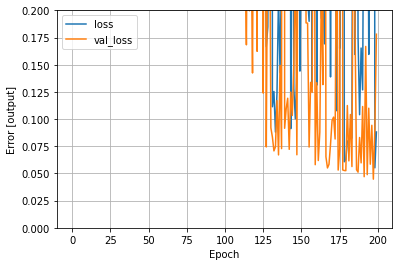

In [ ]:
plot_loss(history)

In [ ]:
dl_model.evaluate(X_test,y_test, verbose=0)

0.18462814390659332

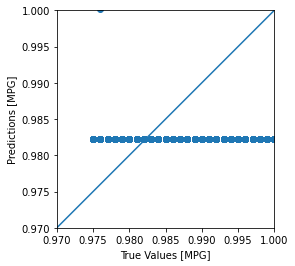

In [ ]:
test_predictions = dl_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0.97,1.00]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [ ]:
test_predictions

array([0.9822163, 1.2836306, 1.972331 , ..., 2.0005362, 1.2369685,
       1.275174 ], dtype=float32)

In [ ]:
print('MAE:', mean_absolute_error(y_test, test_predictions))
print('MSE:', mean_squared_error(y_test, test_predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, test_predictions)))
print('R2 Score:', r2_score(y_test, test_predictions))

MAE: 0.2826414596996307
MSE: 0.18462848183047084
RMSE: 0.4296841652079709
R2 Score: -3268.0903777809594


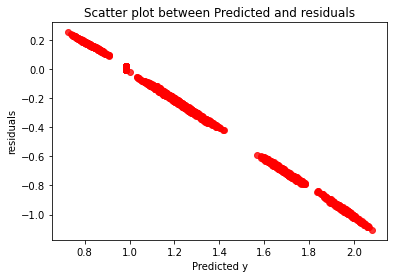

In [ ]:
# Residuals plot
residuals  = y_test - test_predictions
sns.regplot(x = test_predictions, y = residuals,scatter = True, fit_reg= False,color='red')
plt.xlabel('Predicted y')
plt.ylabel('residuals')
plt.title('Scatter plot between Predicted and residuals')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


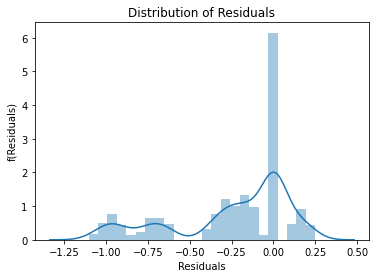

In [ ]:
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('f(Residuals)')
plt.title('Distribution of Residuals')
plt.show()